<a href="https://colab.research.google.com/github/chajunhyeop/-/blob/main/ubion4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##2023.01.05
##머신러닝
###교차검증

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ashopping.csv", encoding = 'cp949')
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,131.257143
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,770.666667
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,355.230769
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,138.535714


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [6]:
df.isnull().sum()

고객ID         0
이탈여부         0
총매출액         0
구매금액대        0
방문빈도         0
1회 평균매출액     0
할인권 사용 횟수    0
총 할인 금액      0
고객등급         0
구매유형         0
클레임접수여부      0
구매카테고리수      0
거주지역         0
성별           0
고객 나이대       0
거래기간         0
할인민감여부       0
Recency      0
Frequency    0
Monetary     0
평균 구매주기      0
dtype: int64

In [7]:
#필요열(변수, feature)만 뽑아서 만들기
X = df[["총매출액", "1회 평균매출액", "할인권 사용 횟수"]]
Y = df["평균 구매주기"]

print(X)

         총매출액  1회 평균매출액  할인권 사용 횟수
0     4963160    225598          1
1     2271520     59777         22
2     2484250   1242125          6
3     2778850    308761          1
4     4437610    443761          9
..        ...       ...        ...
995  12731560    363759          3
996   3419010    569835          6
997   4612100    354777          8
998   5165360    184477         20
999   4323050    270191         19

[1000 rows x 3 columns]


In [8]:
#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#model 만들기
model = KNeighborsRegressor() #regressor 평균 구매주기가 연속형이기에 회귀형

#교차검증(k_fold)
score = cross_val_score(model, X_train, Y_train, cv=9)
print(score)

[0.57107448 0.58829527 0.73436661 0.55607385 0.62849042 0.7343753
 0.60699274 0.72066144 0.78831826]


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

X = df[["총매출액", "거래기간", "방문빈도"]]
Y = df["이탈여부"]

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#model 만들기
model = KNeighborsClassifier() #classifier "이탈여부" 범주형이기에 분류형

#검증 ( Stratified K-fold Cross-Validation test)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state=0)
scores = cross_val_score(model, X_train, Y_train, cv = skf)
print("교차검증 점수 :", scores)

교차검증 점수 : [0.64285714 0.7        0.67857143 0.67142857 0.70714286]


In [10]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=10e35e050ba7c5c71c3448f14163b5777f979d5249309d1114ba4b42d106b10e
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [11]:
#cv와 parameter의 최적값을 찾아서 확인해야함. 
#accuracy가 높을수록 좋은 모델이다.....
##########cv가 a가되고 따른 parameter가 b가되어 accuracy가 c가되는데 이것은 내가 구하는 모델에 적절한가###########

from sklearn.model_selection import GridSearchCV

X = df[["총매출액", "거래기간", "방문빈도"]]
Y = df["이탈여부"]

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#model 만들기
model = KNeighborsClassifier() #classifier "이탈여부" 범주형이기에 분류형

#그리드 인자 검색 
mylist = list(range(1,50))
k_list = [x for x in mylist if x %2 !=0]
parameter_grid = {"n_neighbors" : k_list}

#그리드 서치 
grid_search = GridSearchCV(model, parameter_grid , cv=5)
grid_search.fit(X_train, Y_train)
grid_search.best_params_

{'n_neighbors': 9}

In [12]:
grid_search.best_params_

{'n_neighbors': 9}

In [13]:
parameter_grid

{'n_neighbors': [1,
  3,
  5,
  7,
  9,
  11,
  13,
  15,
  17,
  19,
  21,
  23,
  25,
  27,
  29,
  31,
  33,
  35,
  37,
  39,
  41,
  43,
  45,
  47,
  49]}

In [14]:
#그리드 서치
grid_search=GridSearchCV(model, parameter_grid, cv = 10)
grid_search.fit(X_train, Y_train)

grid_search.best_params_
grid_search.cv_results_

{'mean_fit_time': array([0.00235708, 0.00247765, 0.00399585, 0.0036283 , 0.00312381,
        0.00229437, 0.00262198, 0.00234706, 0.00207591, 0.00210643,
        0.00374122, 0.0041034 , 0.00346541, 0.00286899, 0.00228977,
        0.00223989, 0.0021127 , 0.00199165, 0.00201077, 0.00208719,
        0.00219872, 0.00212843, 0.00234239, 0.00202904, 0.00227478]),
 'std_fit_time': array([6.30393800e-04, 8.65503125e-04, 1.69126020e-03, 3.22991780e-04,
        5.96352277e-04, 3.57064376e-04, 7.49429954e-04, 4.24193074e-04,
        1.56780475e-04, 2.76819885e-04, 6.95659435e-04, 1.56411973e-03,
        2.18890019e-04, 9.27886432e-04, 5.58974665e-04, 3.27015184e-04,
        1.91623615e-04, 5.46563556e-05, 5.24028417e-05, 1.46514106e-04,
        3.06409329e-04, 1.52133550e-04, 4.03888786e-04, 6.12812928e-05,
        4.02286311e-04]),
 'mean_score_time': array([0.0039371 , 0.00460188, 0.00717692, 0.00623968, 0.00588996,
        0.0043736 , 0.00491204, 0.00428517, 0.00379674, 0.00419352,
        0.00

In [15]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [16]:
from sklearn.metrics import accuracy_score
be = grid_search.best_estimator_
pred = be.predict(X_test) #x_test로 y값 도출
accuracy_score(Y_test, pred) #정확도 추출

0.6433333333333333

In [17]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [18]:
#데이터 지정(변수)
from sklearn.feature_selection import SelectKBest, chi2
X = df.drop(["고객ID", "이탈여부"], axis=1)
Y = df["이탈여부"]
#데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)
#일변량 통계기반
selector = SelectKBest()
selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["Chi2"] = selector.scores_
score["p_value"] = selector.pvalues_
score["support"] = selector.get_support()
score["attribute"] = X_train.columns
score[score["support"]==True]
#p_value값을 보게되면 0.05 이하로 모든변수가 영향이 있다.
#y값에대한 영향이므로 x변수끼리 상관관계분석을 통해 변수 전처리가 필요함 (제거 혹은 주성분,요인)

,Chi2,p_value,support,attribute
0,11.220487,8.525018e-04,True,총매출액
1,21.391230,4.462997e-06,True,구매금액대
2,40.530259,3.508018e-10,True,방문빈도
3,31.867994,2.401115e-08,True,1회 평균매출액
8,6.784768,9.389630e-03,True,클레임접수여부
11,12.171897,5.156069e-04,True,성별
13,60.680197,2.435210e-14,True,거래기간
14,86.354376,1.882930e-19,True,할인민감여부
16,6.449529,1.131399e-02,True,Frequency
18,40.217271,4.081567e-10,True,평균 구매주기


In [19]:
from  sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

#threshold = 기준점 (성능을 낮출지 높힐지), 대부분 median으로 둔다. 
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state=0), threshold = "median")
selector.fit(X_train, Y_train)

score = pd.DataFrame()
score["attribute"] = X_train.columns
score["support"] = selector.get_support()
score[score["support"] ==True]

,attribute,support
0,총매출액,True
2,방문빈도,True
3,1회 평균매출액,True
4,할인권 사용 횟수,True
5,총 할인 금액,True
10,거주지역,True
12,고객 나이대,True
13,거래기간,True
14,할인민감여부,True
18,평균 구매주기,True


#데이터 벨런싱 
오버샘플링, 언더샘플링

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [21]:
df.describe()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.300000,5.858013e+06,0.700000,22.91100,3.521024e+05,16.027000,292371.670000,1.546000,2.656000,...,5.217000,5.147000,0.189000,3.964000,3495.891000,0.400000,4.925000,2.289000,4.129000,266.880824
std,288.819436,0.458487,5.812815e+06,0.781416,19.08217,3.124636e+05,8.341334,111937.501042,0.498129,1.046307,...,2.224153,1.169084,0.391705,1.078827,965.966194,0.490143,1.744253,1.669811,1.560383,254.077398
min,1.000000,0.000000,1.886100e+06,0.000000,1.00000,2.708200e+04,1.000000,3750.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,827.000000,0.000000,1.000000,1.000000,1.000000,13.980645
25%,250.750000,0.000000,2.815905e+06,0.000000,10.75000,1.631242e+05,9.000000,261686.250000,1.000000,2.000000,...,3.000000,4.000000,0.000000,3.000000,2871.000000,0.000000,4.000000,1.000000,3.000000,111.957671
50%,500.500000,0.000000,4.092145e+06,0.500000,18.00000,2.582080e+05,17.000000,347500.000000,2.000000,2.000000,...,5.000000,5.000000,0.000000,4.000000,3836.000000,0.000000,5.000000,2.000000,4.000000,191.469697
75%,750.250000,1.000000,6.545392e+06,1.000000,28.00000,4.268310e+05,23.000000,365400.000000,2.000000,4.000000,...,7.000000,6.000000,0.000000,5.000000,4207.250000,1.000000,7.000000,3.000000,6.000000,324.386218
max,1000.000000,1.000000,6.759576e+07,2.000000,155.00000,2.798500e+06,30.000000,400600.000000,2.000000,4.000000,...,9.000000,7.000000,1.000000,7.000000,5334.000000,1.000000,7.000000,7.000000,7.000000,1956.000000


In [22]:
df.isnull().sum()

고객ID         0
이탈여부         0
총매출액         0
구매금액대        0
방문빈도         0
1회 평균매출액     0
할인권 사용 횟수    0
총 할인 금액      0
고객등급         0
구매유형         0
클레임접수여부      0
구매카테고리수      0
거주지역         0
성별           0
고객 나이대       0
거래기간         0
할인민감여부       0
Recency      0
Frequency    0
Monetary     0
평균 구매주기      0
dtype: int64

In [23]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

X_train_under, Y_train_under = RandomUnderSampler(random_state = 0).fit_resample(X_train, Y_train)

print("original data %s" %Counter(Y))
print("original train data %s" %Counter(Y_train))
print("under train data %s" %Counter(Y_train_under))

original data Counter({0: 700, 1: 300})
original train data Counter({0: 481, 1: 219})
under train data Counter({0: 219, 1: 219})


In [24]:
#오버 샘플링
from imblearn.over_sampling import SMOTE #Synthetic minority over-sampling techniqe

X_train_over, Y_train_over = SMOTE(random_state = 0).fit_resample(X_train, Y_train)

print("original data %s" %Counter(Y))
print("original train data %s" %Counter(Y_train))
print("over train data %s" %Counter(Y_train_over))


original data Counter({0: 700, 1: 300})
original train data Counter({0: 481, 1: 219})
over train data Counter({1: 481, 0: 481})


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

선형 회귀 분석

In [26]:
#seaborn 패키지 : 데이터분석
import seaborn as sns
import numpy as np 
import pandas as pd

In [27]:
df["평균 구매주기"].describe()

count    1000.000000
mean      266.880824
std       254.077398
min        13.980645
25%       111.957671
50%       191.469697
75%       324.386218
max      1956.000000
Name: 평균 구매주기, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_

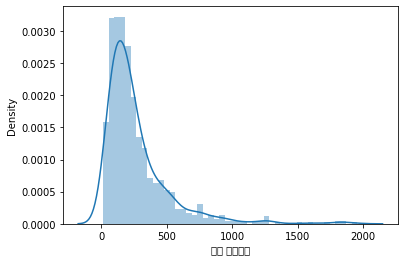

In [28]:
sns.distplot(df["평균 구매주기"])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_

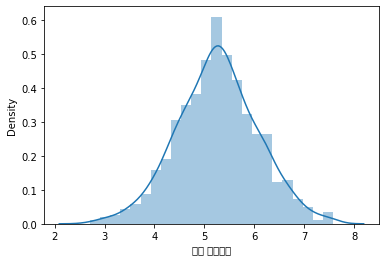

In [29]:
df["평균 구매주기"] = np.log1p(df["평균 구매주기"])
sns.distplot(df["평균 구매주기"])

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
#num : 숫자형변수    cp : 카테고리형 변수
num = ["총매출액", "1회 평균매출액", "할인권 사용 횟수", "총 할인 금액", "구매카테고리수", "Frequency", "Monetary"]
cg = ["구매금액대", "고객등급", "구매유형", "클레임접수여부", "거주지역", "성별", "고객 나이대"]

X = df[df.이탈여부 == 0][num+cg]
Y = df[df.이탈여부 == 0]['평균 구매주기']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state = 0)

#표준화, 원핫인코딩
ct = ColumnTransformer([('scling', StandardScaler(), num), ("onehot", OneHotEncoder(sparse = False), cg)])
ct.fit(X_train)
X_train= ct.transform(X_train)
X_test= ct.transform(X_test)

print(X_train[0])

[-0.42215576 -0.59782402  0.72324173  0.52150413  1.67181667 -0.24075719
  0.52402175  1.          0.          0.          1.          0.
  0.          0.          1.          0.          0.          1.
  0.          0.          0.          0.          1.          0.
  0.          1.          0.          0.          0.          1.
  0.          0.          0.        ]


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

lr = LinearRegression().fit(X_train, Y_train)

Y_pred = lr.predict(X_test)
print("predict value\n", Y_pred)
print("trainR2 : {:.3f}".format(lr.score(X_train, Y_train)))
print("testR2 : {:.3f}".format(lr.score(X_test, Y_test)))

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE : {:.3f}".format(rmse))

predict value
 [6.0302701  5.41215677 5.42420867 6.43899079 4.93590919 5.85532849
 4.56394358 3.8038955  5.22290102 5.61752221 5.66755858 3.44015256
 4.32828323 5.41149193 5.83496713 5.04649847 5.12441095 5.61717937
 5.28594149 5.43582927 5.45116422 5.26304722 5.70801146 5.03246422
 4.70523751 5.39010832 5.59724863 4.08965942 4.40771408 5.45203619
 5.39920771 5.65530022 5.27711883 5.7898368  5.34802942 5.55984513
 5.18690689 5.57605304 5.47013415 6.61038086 5.42457581 4.43007687
 4.68874494 4.29082123 4.77392453 5.94844185 4.93573451 5.44179832
 5.29885396 5.79849569 5.44895057 6.13893195 4.70853914 4.72136082
 5.26288015 5.29559649 4.9944117  5.70877743 4.22588554 5.06871067
 5.13133955 4.83694564 4.444105   5.55643915 4.70940657 5.48285624
 5.44463304 4.79091017 5.55952311 3.24002924 5.61109691 5.0678168
 5.25923693 4.69626943 3.98374392 5.84571399 5.66972277 5.3203395
 4.21100319 4.96752541 4.81038608 5.46601131 5.26382683 4.61218179
 5.48213481 5.17219235 4.98828846 5.52966787 4.19

In [34]:
print("절편", np.round(lr.intercept_,3))
print("가중치(beta)", np.round(lr.coef_, 3))

절편 5.204
가중치(beta) [-0.156  0.388 -0.019 -0.01   0.035 -0.29   0.015  0.292 -0.001 -0.29
  0.014 -0.014  0.055  0.036  0.008 -0.099 -0.08   0.08   0.427 -0.082
 -0.06  -0.194 -0.021 -0.078  0.008 -0.055  0.055 -0.427  0.01   0.07
  0.043  0.048  0.257]


In [35]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

릿지, 라쏘 회귀

In [37]:
from sklearn.linear_model import Ridge

lr_ridge = Ridge(random_state = 0).fit(X_train, Y_train)
Y_pred = lr_ridge.predict(X_test)

print("예측값(Y predict value)\n", Y_pred)

예측값(Y predict value)
 [6.03000797 5.41671746 5.42932123 6.44127922 4.93860553 5.85932374
 4.56839084 3.81054588 5.22477967 5.61889847 5.66813628 3.42981349
 4.33248596 5.41101642 5.83804147 5.04471767 5.1211324  5.61206657
 5.28801914 5.32488795 5.45169079 5.25880606 5.71346032 5.02859175
 4.70951147 5.38878901 5.60027856 4.09721037 4.40744067 5.45098959
 5.39702921 5.64784758 5.27252093 5.79008128 5.35467632 5.56063965
 5.19607603 5.57536879 5.46592343 6.61557262 5.42387534 4.43825559
 4.69193156 4.30121093 4.7731486  5.950302   4.94125475 5.44030949
 5.2948706  5.79698793 5.44723488 6.13538058 4.70865764 4.72464693
 5.25715635 5.29808444 4.9962477  5.70904828 4.24165264 5.06579461
 5.1252699  4.83996783 4.44518243 5.55905844 4.70841625 5.47720406
 5.44152413 4.79120395 5.56974829 3.25280314 5.6106784  5.06803014
 5.25956393 4.70791967 3.98838094 5.84965084 5.67331254 5.31944294
 4.21646513 4.98002289 4.81229781 5.46333154 5.27177929 4.610552
 5.48261262 5.17186083 4.9841382  5.528922

In [42]:
from joblib.disk import RM_SUBDIRS_RETRY_TIME
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("R2 : {:.3f}".format(lr_ridge.score(X_train, Y_train)))
print("RMSE : {:.3f}".format(rmse))
#비교
print("lr R2 : {:.3f}".format(lr.score(X_train, Y_train)))

R2 : 0.726
RMSE : 0.403
lr R2 : 0.726


In [43]:
from sklearn.linear_model import Lasso

lr_lasso = Lasso(random_state = 0, alpha = 0.01, max_iter = 1000).fit(X_train, Y_train)
Y_pred = lr_lasso.predict(X_test)

print("예측값(Y predict value)\n", Y_pred)

예측값(Y predict value)
 [5.85999035 5.43036643 5.44663007 6.48906612 4.97641413 5.69822258
 4.5716117  3.88906492 5.27984535 5.54858587 5.67709958 3.30742434
 4.45272397 5.42149034 5.87903236 5.00187799 5.12055037 5.56949787
 5.33279402 5.0264179  5.52733519 5.1867408  5.665303   5.0119166
 4.70132881 5.44864394 5.62488274 4.16327321 4.38211259 5.4308754
 5.37511549 5.67040693 5.19104603 5.79672221 5.47877539 5.4547485
 5.25369206 5.54714363 5.42273349 6.6026743  5.44052754 4.61359453
 4.74827815 4.47000201 4.78926599 5.82570411 4.93589832 5.42347938
 5.19064772 5.71009563 5.38598782 5.87895508 4.47556196 4.77561637
 5.23514088 5.36821002 4.94726191 5.74052715 4.48801399 4.99109917
 4.96578984 4.92437103 4.49896869 5.51596171 4.70911385 5.37807152
 5.38059893 4.70777152 5.63186935 3.33411699 5.63024419 5.02637709
 5.23878352 4.85617924 4.07737633 5.82495727 5.67069263 5.22957699
 4.31245514 5.15236296 4.79517679 5.3733623  5.32829571 4.50502391
 5.54652945 5.21846617 5.01779632 5.5396285

In [46]:
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("lasso R2 : {:.3f}".format(lr_lasso.score(X_train, Y_train)))
print("RMSE : {:.3f}".format(rmse))
#비교
print("lr R2 : {:.3f}".format(lr.score(X_train, Y_train)))
print("ridge R2 : {:.3f}".format(lr_ridge.score(X_train, Y_train)))

lasso R2 : 0.709
RMSE : 0.391
lr R2 : 0.726
ridge R2 : 0.726


In [47]:
from sklearn.linear_model import ElasticNet

lr_ela = ElasticNet(alpha = 0.01).fit(X_train, Y_train)
Y_pred = lr_ela.predict(X_test)

print("예측값(Y predict value) \n", Y_pred)

예측값(Y predict value) 
 [5.9405265  5.43949734 5.45645319 6.46077287 4.95641647 5.75737516
 4.58077628 3.8664991  5.2544911  5.56797779 5.69465169 3.35014751
 4.41740921 5.41472514 5.87198794 5.01984866 5.1079496  5.56938294
 5.33424602 5.01150019 5.50236848 5.21289944 5.70405138 5.00509779
 4.73712733 5.43318095 5.63394533 4.16143035 4.40905906 5.45448006
 5.38029119 5.65239382 5.22517748 5.78702872 5.43971899 5.50091954
 5.24686551 5.54584606 5.45012419 6.63427603 5.44729928 4.5642916
 4.7153638  4.40426435 4.79804451 5.87250388 4.95774286 5.42138422
 5.21745366 5.74415372 5.42050245 5.98513427 4.55881782 4.75746308
 5.24959713 5.33108418 4.9783863  5.741972   4.39245511 5.01488932
 5.01745308 4.88230883 4.47336366 5.52395419 4.69688542 5.41272695
 5.3969981  4.7412395  5.62539593 3.29112611 5.63602937 5.02901435
 5.25500609 4.80177521 4.03300414 5.85055833 5.6889433  5.2796506
 4.26043501 5.08768705 4.80884726 5.39430314 5.33776004 4.52387454
 5.51513909 5.19015221 4.99602694 5.54968

In [49]:
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("ela R2 : {:.3f}".format(lr_ela.score(X_train, Y_train)))
print("RMSE : {:.3f}".format(rmse))
#비교
print("lr R2 : {:.3f}".format(lr.score(X_train, Y_train)))
print("ridge R2 : {:.3f}".format(lr_ridge.score(X_train, Y_train)))
print("lasso R2 : {:.3f}".format(lr_lasso.score(X_train, Y_train)))

#ela : 라쏘 릿지 절충한 것 

ela R2 : 0.717
RMSE : 0.394
lr R2 : 0.726
ridge R2 : 0.726
lasso R2 : 0.709


#로지스틱 회귀분석

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [51]:
df.describe()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.300000,5.858013e+06,0.700000,22.91100,3.521024e+05,16.027000,292371.670000,1.546000,2.656000,...,5.217000,5.147000,0.189000,3.964000,3495.891000,0.400000,4.925000,2.289000,4.129000,5.260784
std,288.819436,0.458487,5.812815e+06,0.781416,19.08217,3.124636e+05,8.341334,111937.501042,0.498129,1.046307,...,2.224153,1.169084,0.391705,1.078827,965.966194,0.490143,1.744253,1.669811,1.560383,0.812845
min,1.000000,0.000000,1.886100e+06,0.000000,1.00000,2.708200e+04,1.000000,3750.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,827.000000,0.000000,1.000000,1.000000,1.000000,2.706759
25%,250.750000,0.000000,2.815905e+06,0.000000,10.75000,1.631242e+05,9.000000,261686.250000,1.000000,2.000000,...,3.000000,4.000000,0.000000,3.000000,2871.000000,0.000000,4.000000,1.000000,3.000000,4.727013
50%,500.500000,0.000000,4.092145e+06,0.500000,18.00000,2.582080e+05,17.000000,347500.000000,2.000000,2.000000,...,5.000000,5.000000,0.000000,4.000000,3836.000000,0.000000,5.000000,2.000000,4.000000,5.259938
75%,750.250000,1.000000,6.545392e+06,1.000000,28.00000,4.268310e+05,23.000000,365400.000000,2.000000,4.000000,...,7.000000,6.000000,0.000000,5.000000,4207.250000,1.000000,7.000000,3.000000,6.000000,5.785012
max,1000.000000,1.000000,6.759576e+07,2.000000,155.00000,2.798500e+06,30.000000,400600.000000,2.000000,4.000000,...,9.000000,7.000000,1.000000,7.000000,5334.000000,1.000000,7.000000,7.000000,7.000000,7.579168


In [52]:
df.isnull().sum()

고객ID         0
이탈여부         0
총매출액         0
구매금액대        0
방문빈도         0
1회 평균매출액     0
할인권 사용 횟수    0
총 할인 금액      0
고객등급         0
구매유형         0
클레임접수여부      0
구매카테고리수      0
거주지역         0
성별           0
고객 나이대       0
거래기간         0
할인민감여부       0
Recency      0
Frequency    0
Monetary     0
평균 구매주기      0
dtype: int64

In [54]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [58]:
X = df[["총매출액", "거래기간", "방문빈도"]]
Y = df["이탈여부"]

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#scaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)

#데이터벨런싱 
#오버 샘플링
from imblearn.over_sampling import SMOTE #Synthetic minority over-sampling techniqe

X_train_over, Y_train_over = SMOTE(random_state = 0).fit_resample(X_train, Y_train)

#데이터비율확인
print("original data %s" %Counter(Y))
print("original train data %s" %Counter(Y_train))
print("over train data %s" %Counter(Y_train_over))


[[ 0.69336175  0.22690456  0.03475125]
 [-0.225208   -0.02778804 -0.17540748]
 [-0.52055725  0.61729402  0.98046554]
 ...
 [-0.60960507  0.55779616 -0.01778844]
 [-0.02842033 -0.64468689 -0.22794717]
 [-0.30394592  0.83127755 -0.70080431]]
original data Counter({0: 700, 1: 300})
original train data Counter({0: 481, 1: 219})
over train data Counter({1: 481, 0: 481})


In [63]:
from sklearn.linear_model import LogisticRegression

#로지스틱 회귀분석에는 c를 대부분 1 로 넣는다. 
logit = LogisticRegression(C = 1, random_state = 0)
logit.fit(X_train_over, Y_train_over)
Y_pred = logit.predict(X_test)

#Y_pred
print("R2 : {:3f}".format(logit.score(X_train_over, Y_train_over)))

from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))
print(logit.intercept_)
print(logit.coef_)
#f1스코어는 precision 과 recall의 조합이다.
#support는 각 클래스의 개수이다


R2 : 0.709979
              precision    recall  f1-score   support

           0       0.91      0.66      0.77       219
           1       0.47      0.81      0.60        81

    accuracy                           0.70       300
   macro avg       0.69      0.74      0.68       300
weighted avg       0.79      0.70      0.72       300

[-0.10121145]
[[-0.10720418 -0.58431042 -0.47899592]]


다항로지스틱회기분석

In [82]:
X = df[["방문빈도", "총 할인 금액", "거래기간", "할인민감여부"]]
Y = df["구매금액대"]

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#Column transformer
ct = ColumnTransformer([('scaling', StandardScaler(), ["방문빈도", "총 할인 금액", "거래기간"]),
                        ("onehot", OneHotEncoder(sparse = False), ["할인민감여부"])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test= ct.transform(X_test)

#오버샘플링해주면 더 좋음

#model 다항분포 = multinomial
multilogit = LogisticRegression(random_state=0, C =0.1, solver='newton-cg', multi_class="multinomial")
##solver : "lbfgs" , "liblinear" , "sag, saga"
multilogit.fit(X_train, Y_train)
Y_pred = multilogit.predict(X_test)

#성능 
print("R2 : {:3f}".format(multilogit.score(X_train, Y_train)))
print(classification_report(Y_test, Y_pred))
                        

R2 : 0.605714
              precision    recall  f1-score   support

           0       0.61      0.89      0.72       154
           1       0.40      0.12      0.19        82
           2       0.71      0.55      0.62        64

    accuracy                           0.61       300
   macro avg       0.57      0.52      0.51       300
weighted avg       0.57      0.61      0.55       300



In [83]:
df

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,5.011544
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,4.410883
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,7.505492
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,6.001690
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,5.896604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,12731560,2,35,363759,3,44445,2,3,...,8,6,0,4,4629,1,3,3,1,4.884748
996,997,0,3419010,0,6,569835,6,186545,1,2,...,9,6,0,4,4630,1,7,3,6,6.648553
997,998,0,4612100,1,13,354777,8,260700,2,1,...,1,4,1,6,4631,1,2,1,2,5.875579
998,999,0,5165360,1,28,184477,20,347700,1,3,...,7,5,1,6,3907,0,7,2,6,4.938321


In [84]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [96]:
####classification

X = df[["총매출액","1회 평균매출액", "방문빈도", "거래기간", "평균 구매주기"]]
Y = df["이탈여부"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

scaler = StandardScaler().fit(X_train, Y_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

#over sampling
X_train, Y_train = SMOTE(random_state=0).fit_resample(X_train, Y_train)

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=9, metric="euclidean")

knn_model.fit(X_train, Y_train)
Y_pred = knn_model.predict(X_test)
print("accuracy : {:3f}".format(knn_model.score(X_train, Y_train)))
print(classification_report(Y_test, Y_pred))

accuracy : 0.844075
              precision    recall  f1-score   support

           0       0.92      0.77      0.84       219
           1       0.56      0.81      0.67        81

    accuracy                           0.78       300
   macro avg       0.74      0.79      0.75       300
weighted avg       0.82      0.78      0.79       300



In [ ]:
#이전 knn분석
from sklearn.model_selection import GridSearchCV

X = df[["총매출액", "거래기간", "방문빈도"]]
Y = df["이탈여부"]

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#model 만들기
model = KNeighborsClassifier() #classifier "이탈여부" 범주형이기에 분류형

#그리드 인자 검색 
mylist = list(range(1,50))
k_list = [x for x in mylist if x %2 !=0]
parameter_grid = {"n_neighbors" : k_list}

#그리드 서치 
grid_search = GridSearchCV(model, parameter_grid , cv=5)
grid_search.fit(X_train, Y_train)
grid_search.best_params_

In [99]:
#numeric value(Y)

import numpy as np

X = df[df.이탈여부 ==0][["총매출액", "1회 평균매출액", "총 할인 금액", "구매카테고리수", "Frequency"]]
Y = df[df.이탈여부 ==0]["평균 구매주기"]

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

scaler = StandardScaler().fit(X_train, Y_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=9, p=2)

#p : int, default = 2
#Power parameter for the Minkowski metric. When p = 1.
#this is equivalent to using manhattan_distance (11), and euclidean_distance(12) for p = 2, for arbitrary p, 

knn_reg.fit(X_train, Y_train)
Y_pred = knn_reg.predict(X_test)
print("accuracy: {:.3f}".format(knn_reg.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSEl {:.3f}". format(rmse))

accuracy: 0.765
RMSEl 0.381
